In [1]:
# Idea: 
# repreent the result of a quantum computation (collection of bitstrings)
# as a cube, with a number of voxel = 2*n, where n = number of qubits

In [1]:
# Pseudocode:
# load a json, representing a prototypical result of quantum computer
# represent the result as a cube 
# print it as 3D cube

# Maxpooling routine on the cube
# implemented as a modification of the bitstring (ignoring 3 qubits) 
# followed by a group by on the remaining qubits

In [2]:
%matplotlib notebook

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np

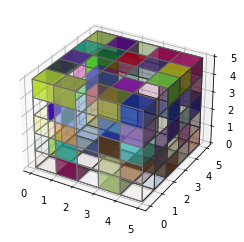

In [2]:
# Create axis
axes = [5, 5, 5]
  
# Create Data
data = np.ones(axes, dtype=bool)
  
# Controll Tranperency
alpha = 0.5
  
# Control colour
colors = np.random.rand(*(axes + [4])) #, dtype=np.float32)
  
#colors[0] = [1, 0, 0, alpha]  # red
#colors[1] = [0, 1, 0, alpha]  # green
#colors[2] = [0, 0, 1, alpha]  # blue
#colors[3] = [1, 1, 0, alpha]  # yellow
#colors[4] = [1, 1, 1, alpha]  # grey
  
# Plot figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
  
# Voxels is used to customizations of
# the sizes, positions and colors.
ax.voxels(data, facecolors=colors, edgecolors='grey')
plt.show()

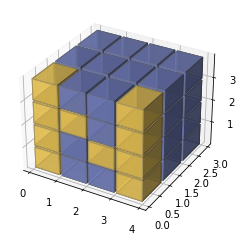

In [3]:
import matplotlib.pyplot as plt
import numpy as np


def explode(data):
    size = np.array(data.shape)*2
    data_e = np.zeros(size - 1, dtype=data.dtype)
    data_e[::2, ::2, ::2] = data
    return data_e

# build up the numpy logo
n_voxels = np.zeros((4, 3, 4), dtype=bool)
n_voxels[0, 0, :] = True
n_voxels[-1, 0, :] = True
n_voxels[1, 0, 2] = True
n_voxels[2, 0, 1] = True
facecolors = np.where(n_voxels, '#FFD65DC0', '#7A88CCC0')
edgecolors = np.where(n_voxels, '#BFAB6E', '#7D84A6')
filled = np.ones(n_voxels.shape)

# upscale the above voxel image, leaving gaps
filled_2 = explode(filled)
fcolors_2 = explode(facecolors)
ecolors_2 = explode(edgecolors)

# Shrink the gaps
x, y, z = np.indices(np.array(filled_2.shape) + 1).astype(float) // 2
x[0::2, :, :] += 0.05
y[:, 0::2, :] += 0.05
z[:, :, 0::2] += 0.05
x[1::2, :, :] += 0.95
y[:, 1::2, :] += 0.95
z[:, :, 1::2] += 0.95

ax = plt.figure().add_subplot(projection='3d')
ax.voxels(x, y, z, filled_2, facecolors=fcolors_2, edgecolors=ecolors_2)

plt.show()

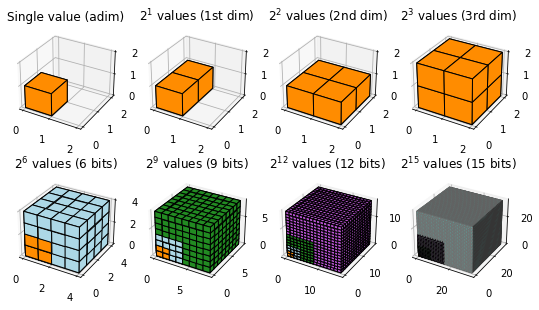

In [7]:
# define visible area
canvas_area = np.zeros([2, 2, 2], dtype=bool)

# Create 0 bit - cube
cube_0_bit = np.ones([1, 1, 1], dtype=bool)


# Create 1 bit - cube
cube_1_bit = np.ones([1, 2, 1], dtype=bool)

# Create 2 bit - cube
cube_2_bit = np.ones([2, 2, 1], dtype=bool)

# Create 3 bit - cube
cube_3_bit = np.ones([2, 2, 2], dtype=bool)

# Create 6 bit - cube + 64 bit outer cube
canvas_area_6_bit = np.zeros([4, 4, 4], dtype=bool)
cube_6_bit = np.ones([4, 4, 4], dtype=bool)

# Create 9 bit - cube + 64 bit outer cube
canvas_area_9_bit = np.zeros([8, 8, 8], dtype=bool)
cube_9_bit = np.ones([8, 8, 8], dtype=bool)

# Create 12 bit - cube + 64 bit outer cube
canvas_area_12_bit = np.zeros([16, 16, 16], dtype=bool)
cube_12_bit = np.ones([16, 16, 16], dtype=bool)

# Create 15 bit - cube + 64 bit outer cube
canvas_area_15_bit = np.zeros([32, 32, 32], dtype=bool)
cube_15_bit = np.ones([32, 32, 32], dtype=bool)


fig, axes = plt.subplots(
    2, 4, 
    figsize=(9, 5),
    subplot_kw=dict(projection="3d"))

ax_0_cube = axes[0][0]
ax_1_cube = axes[0][1]
ax_2_cube = axes[0][2]
ax_3_cube = axes[0][3]


ax_recursive_6_cube = axes[1][0]
ax_recursive_9_cube = axes[1][1]
ax_recursive_12_cube = axes[1][2]
ax_recursive_15_cube = axes[1][3]

EDGECOLOR = 'black'
FIRST_CUBE_COLOR = 'darkorange'
SECOND_CUBE_COLOR = 'lightblue'
THIRD_CUBE_COLOR = 'forestgreen'
FORTH_CUBE_COLOR = 'mediumorchid'
FIFTH_CUBE_COLOR = 'turquoise'

ax_0_cube.voxels(cube_0_bit, edgecolors=EDGECOLOR, facecolor=FIRST_CUBE_COLOR)
ax_0_cube.voxels(canvas_area, edgecolors=EDGECOLOR)
ax_0_cube.set_title("Single value (adim)")

ax_1_cube.voxels(cube_1_bit, edgecolors=EDGECOLOR, facecolor=FIRST_CUBE_COLOR)
ax_1_cube.voxels(canvas_area, edgecolors=EDGECOLOR)
ax_1_cube.set_title(r"$2^{1}$ values (1st dim)")

ax_2_cube.voxels(cube_2_bit, edgecolors=EDGECOLOR, facecolor=FIRST_CUBE_COLOR)
ax_2_cube.voxels(canvas_area, edgecolors=EDGECOLOR)
ax_2_cube.set_title(r"$2^{2}$ values (2nd dim)")

ax_3_cube.voxels(cube_3_bit, edgecolors=EDGECOLOR, facecolor=FIRST_CUBE_COLOR)
ax_3_cube.voxels(canvas_area, edgecolors=EDGECOLOR)
ax_3_cube.set_title(r"$2^{3}$ values (3rd dim)")


ax_recursive_6_cube.voxels(cube_6_bit, edgecolors=EDGECOLOR, facecolor=SECOND_CUBE_COLOR)
ax_recursive_6_cube.voxels(cube_3_bit, edgecolors=EDGECOLOR, facecolor=FIRST_CUBE_COLOR)
ax_recursive_6_cube.voxels(canvas_area_6_bit, edgecolors=EDGECOLOR)
ax_recursive_6_cube.set_title(r"$2^{6}$ values (6 bits)")


ax_recursive_9_cube.voxels(cube_9_bit, edgecolors=EDGECOLOR, facecolor=THIRD_CUBE_COLOR)
ax_recursive_9_cube.voxels(cube_6_bit, edgecolors=EDGECOLOR, facecolor=SECOND_CUBE_COLOR)
ax_recursive_9_cube.voxels(cube_3_bit, edgecolors=EDGECOLOR, facecolor=FIRST_CUBE_COLOR)
ax_recursive_9_cube.voxels(canvas_area_9_bit, edgecolors=EDGECOLOR)
ax_recursive_9_cube.set_title(r"$2^{9}$ values (9 bits)")


ax_recursive_12_cube.voxels(cube_12_bit, edgecolors=EDGECOLOR, facecolor=FORTH_CUBE_COLOR)
ax_recursive_12_cube.voxels(cube_9_bit, edgecolors=EDGECOLOR, facecolor=THIRD_CUBE_COLOR)
ax_recursive_12_cube.voxels(cube_6_bit, edgecolors=EDGECOLOR, facecolor=SECOND_CUBE_COLOR)
ax_recursive_12_cube.voxels(cube_3_bit, edgecolors=EDGECOLOR, facecolor=FIRST_CUBE_COLOR)
ax_recursive_12_cube.voxels(canvas_area_12_bit, edgecolors=EDGECOLOR)
ax_recursive_12_cube.set_title(r"$2^{12}$ values (12 bits)")



ax_recursive_15_cube.voxels(cube_15_bit, edgecolors='grey', facecolor=FIFTH_CUBE_COLOR)
ax_recursive_15_cube.voxels(cube_12_bit, edgecolors=EDGECOLOR, facecolor=FORTH_CUBE_COLOR)
ax_recursive_15_cube.voxels(cube_9_bit, edgecolors=EDGECOLOR, facecolor=THIRD_CUBE_COLOR)
ax_recursive_15_cube.voxels(cube_6_bit, edgecolors=EDGECOLOR, facecolor=SECOND_CUBE_COLOR)
ax_recursive_15_cube.voxels(cube_3_bit, edgecolors=EDGECOLOR, facecolor=FIRST_CUBE_COLOR)
ax_recursive_15_cube.voxels(canvas_area_15_bit, edgecolors=EDGECOLOR)
ax_recursive_15_cube.set_title(r"$2^{15}$ values (15 bits)")





plt.show()

In [ ]:
# Create axis
axes = [5, 5, 5]
  
# Create Data
data = np.ones(axes, dtype=bool)
  
# Controll Tranperency
alpha = 0.5
  
# Control colour
colors = np.ones(*(axes + [4])) #, dtype=np.float32)
  
#colors[0] = [1, 0, 0, alpha]  # red
#colors[1] = [0, 1, 0, alpha]  # green
#colors[2] = [0, 0, 1, alpha]  # blue
#colors[3] = [1, 1, 0, alpha]  # yellow
#colors[4] = [1, 1, 1, alpha]  # grey
  
# Plot figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
  
# Voxels is used to customizations of
# the sizes, positions and colors.
ax.voxels(data, facecolors=colors, edgecolors='grey')
plt.show()